In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json


movie_data = pd.read_csv("merged_df.csv")
movie_data.columns 



Index(['imdb_id', 'original_language', 'overview', 'release_date', 'runtime',
       'title', 'cast', 'crew', 'Year', 'Rated', 'Genre', 'Director', 'Writer',
       'Actors', 'Language', 'Country', 'Awards', 'Poster', 'imdbRating',
       'imdbVotes', 'Type', 'BoxOffice', 'Total Awards'],
      dtype='object')

In [2]:
movie_data.drop(['Total Awards','Type','Poster','imdb_id','Awards','Actors','Writer','Director','crew','cast','overview','original_language'],axis =1,inplace = True)
print("After Removing Unused Columns (Rows,Columns) : ",movie_data.shape) 

After Removing Unused Columns (Rows,Columns) :  (6419, 11)


In [3]:
print("Rows With Zero Values In The Box Office Column:",movie_data[(movie_data['BoxOffice']==0)].shape[0])
print("Rows With Zero Values In The Runtime Column:",movie_data[(movie_data['runtime']==0)].shape[0]) 

Rows With Zero Values In The Box Office Column: 0
Rows With Zero Values In The Runtime Column: 12


In [4]:
movie_data = movie_data[movie_data["Year"] < 2018]


In [5]:
data=movie_data.groupby('Year').count()
print(data.head()) 

      release_date  runtime  title  Rated  Genre  Language  Country  \
Year                                                                  
1980            96       96     96     96     96        96       96   
1981            95       95     95     95     95        95       95   
1982           112      112    112    112    112       112      112   
1983           113      113    113    113    113       113      113   
1984           137      137    137    137    137       137      137   

      imdbRating  imdbVotes  BoxOffice  
Year                                    
1980          96         96         96  
1981          95         95         95  
1982         112        112        112  
1983         113        113        113  
1984         137        137        137  


In [6]:
data=movie_data.groupby('Year').count()
print(data.tail()) 

      release_date  runtime  title  Rated  Genre  Language  Country  \
Year                                                                  
2013           186      186    186    186    186       186      186   
2014           202      202    202    202    202       202      202   
2015           183      183    183    183    183       183      183   
2016           208      208    208    208    208       208      208   
2017            91       91     91     91     91        91       91   

      imdbRating  imdbVotes  BoxOffice  
Year                                    
2013         186        186        186  
2014         202        202        202  
2015         183        183        183  
2016         208        208        208  
2017          91         91         91  


In [7]:
movie_data['Genre'].value_counts() 

Genre
Comedy, Drama, Romance           361
Comedy                           281
Comedy, Drama                    251
Comedy, Romance                  237
Drama, Romance                   217
                                ... 
Crime, Horror                      1
Family, Adventure                  1
Drama, Romance, Music              1
Action, Western                    1
Documentary, Animation, Short      1
Name: count, Length: 398, dtype: int64

In [8]:
movies_df = movie_data[["title", "release_date","Year", "runtime", "BoxOffice", "imdbRating", "imdbVotes", "Genre"]] 
movies_df 

,title,release_date,Year,runtime,BoxOffice,imdbRating,imdbVotes,Genre
0,Toy Story,1995-10-30,1995,81.0,223225679.0,8.3,1084764.0,"Animation, Adventure, Comedy"
1,Jumanji,1995-12-15,1995,104.0,100499940.0,7.1,382657.0,"Adventure, Comedy, Family"
2,Grumpier Old Men,1995-12-22,1995,101.0,71518503.0,6.7,30011.0,"Comedy, Romance"
3,Waiting to Exhale,1995-12-22,1995,127.0,67052156.0,6.0,12462.0,"Comedy, Drama, Romance"
4,Father of the Bride Part II,1995-02-10,1995,106.0,76594107.0,6.1,42152.0,"Comedy, Family, Romance"
...,...,...,...,...,...,...,...,...
6414,Wind River,2017-08-03,2017,111.0,33800859.0,7.7,284501.0,"Crime, Drama, Mystery"
6415,Wish Upon,2017-07-07,2017,90.0,14301505.0,5.1,23251.0,"Drama, Fantasy, Horror"
6416,Girls Trip,2017-07-21,2017,122.0,115171585.0,6.2,41022.0,"Adventure, Comedy, Drama"
6417,Detroit,2017-07-28,2017,143.0,16790139.0,7.3,56404.0,"Crime, Drama, History"


In [9]:
movies_rated = movies_df.sort_values(by= 'imdbRating', ascending = False)
movies_rated

,title,release_date,Year,runtime,BoxOffice,imdbRating,imdbVotes,Genre
215,The Shawshank Redemption,1994-09-23,1994,142.0,28767189.0,9.3,2932194.0,Drama
383,Schindler's List,1993-11-29,1993,195.0,96898818.0,9.0,1474085.0,"Biography, Drama, History"
4452,The Dark Knight,2008-07-16,2008,152.0,534987076.0,9.0,2919777.0,"Action, Crime, Drama"
3311,The Lord of the Rings: The Return of the King,2003-12-01,2003,201.0,381878219.0,9.0,2004761.0,"Action, Adventure, Drama"
2506,The Lord of the Rings: The Fellowship of the Ring,2001-12-18,2001,178.0,319372078.0,8.9,2035018.0,"Action, Adventure, Drama"
...,...,...,...,...,...,...,...,...
5801,Justin Bieber: Never Say Never,2011-02-11,2011,105.0,73013910.0,1.7,76451.0,"Documentary, Music"
5566,Justin Bieber's Believe,2013-12-19,2013,92.0,6206566.0,1.6,17918.0,"Documentary, Music"
6182,Jonas Brothers: The Concert Experience,2009-02-27,2009,76.0,19162740.0,1.6,17546.0,"Documentary, Biography, Music"
3561,Superbabies: Baby Geniuses 2,2004-08-27,2004,88.0,9219388.0,1.5,31597.0,"Comedy, Family, Sci-Fi"


In [10]:
movies_rated.head(10)

,title,release_date,Year,runtime,BoxOffice,imdbRating,imdbVotes,Genre
215,The Shawshank Redemption,1994-09-23,1994,142.0,28767189.0,9.3,2932194.0,Drama
383,Schindler's List,1993-11-29,1993,195.0,96898818.0,9.0,1474085.0,"Biography, Drama, History"
4452,The Dark Knight,2008-07-16,2008,152.0,534987076.0,9.0,2919777.0,"Action, Crime, Drama"
3311,The Lord of the Rings: The Return of the King,2003-12-01,2003,201.0,381878219.0,9.0,2004761.0,"Action, Adventure, Drama"
2506,The Lord of the Rings: The Fellowship of the Ring,2001-12-18,2001,178.0,319372078.0,8.9,2035018.0,"Action, Adventure, Drama"
203,Pulp Fiction,1994-09-10,1994,154.0,107928762.0,8.9,2257639.0,"Crime, Drama"
4904,Inception,2010-07-14,2010,148.0,292587330.0,8.8,2592712.0,"Action, Adventure, Sci-Fi"
1519,Fight Club,1999-10-15,1999,139.0,37030102.0,8.8,2371394.0,Drama
2893,The Lord of the Rings: The Two Towers,2002-12-18,2002,179.0,345518923.0,8.8,1811323.0,"Action, Adventure, Drama"
244,Forrest Gump,1994-07-06,1994,142.0,330455270.0,8.8,2291939.0,"Drama, Romance"


In [11]:
movies_rated.tail(10)

,title,release_date,Year,runtime,BoxOffice,imdbRating,imdbVotes,Genre
2058,Leonard Part 6,1987-12-18,1987,85.0,4615255.0,2.2,8685.0,"Action, Comedy, Sci-Fi"
4112,Crossover,2006-09-01,2006,95.0,7009668.0,2.2,9418.0,"Action, Sport"
3208,House of the Dead,2003-04-11,2003,90.0,10249719.0,2.1,38822.0,"Action, Adventure, Horror"
4536,Disaster Movie,2008-08-29,2008,87.0,14190901.0,1.9,95050.0,"Comedy, Sci-Fi"
3081,From Justin to Kelly,2003-06-20,2003,90.0,4928883.0,1.9,27086.0,"Comedy, Music, Musical"
5801,Justin Bieber: Never Say Never,2011-02-11,2011,105.0,73013910.0,1.7,76451.0,"Documentary, Music"
5566,Justin Bieber's Believe,2013-12-19,2013,92.0,6206566.0,1.6,17918.0,"Documentary, Music"
6182,Jonas Brothers: The Concert Experience,2009-02-27,2009,76.0,19162740.0,1.6,17546.0,"Documentary, Biography, Music"
3561,Superbabies: Baby Geniuses 2,2004-08-27,2004,88.0,9219388.0,1.5,31597.0,"Comedy, Family, Sci-Fi"
6037,Saving Christmas,2014-11-14,2014,80.0,2783970.0,1.3,16830.0,"Comedy, Family"


In [12]:
movies_revenue = movies_df.sort_values(by= 'BoxOffice', ascending = False)
movies_revenue

,title,release_date,Year,runtime,BoxOffice,imdbRating,imdbVotes,Genre
5815,Star Wars: The Force Awakens,2015-12-15,2015,136.0,936662225.0,7.8,983726.0,"Action, Adventure, Sci-Fi"
4809,Avatar,2009-12-10,2009,162.0,785221649.0,7.9,1400908.0,"Action, Adventure, Fantasy"
883,Titanic,1997-11-18,1997,194.0,674292608.0,7.9,1303897.0,"Drama, Romance"
5755,Jurassic World,2015-06-09,2015,124.0,653406625.0,6.9,686472.0,"Action, Adventure, Sci-Fi"
5126,The Avengers,2012-04-25,2012,143.0,623357910.0,8.0,1477607.0,"Action, Sci-Fi"
...,...,...,...,...,...,...,...,...
3684,Strangers in Good Company,1990-10-01,1990,101.0,1002689.0,7.7,1345.0,"Adventure, Drama"
381,Ruby in Paradise,1993-10-08,1993,114.0,1001437.0,6.9,3279.0,"Drama, Romance"
3835,My Summer of Love,2004-08-20,2004,86.0,1000915.0,6.7,21966.0,"Drama, Romance"
4252,Goya's Ghosts,2006-11-08,2006,114.0,1000626.0,6.9,32143.0,"Biography, Drama, History"


In [13]:
movies_revenue.head(10)

,title,release_date,Year,runtime,BoxOffice,imdbRating,imdbVotes,Genre
5815,Star Wars: The Force Awakens,2015-12-15,2015,136.0,936662225.0,7.8,983726.0,"Action, Adventure, Sci-Fi"
4809,Avatar,2009-12-10,2009,162.0,785221649.0,7.9,1400908.0,"Action, Adventure, Fantasy"
883,Titanic,1997-11-18,1997,194.0,674292608.0,7.9,1303897.0,"Drama, Romance"
5755,Jurassic World,2015-06-09,2015,124.0,653406625.0,6.9,686472.0,"Action, Adventure, Sci-Fi"
5126,The Avengers,2012-04-25,2012,143.0,623357910.0,8.0,1477607.0,"Action, Sci-Fi"
4452,The Dark Knight,2008-07-16,2008,152.0,534987076.0,9.0,2919777.0,"Action, Crime, Drama"
6279,Rogue One: A Star Wars Story,2016-12-14,2016,133.0,533539991.0,7.8,695832.0,"Action, Adventure, Sci-Fi"
6327,Beauty and the Beast,2017-03-16,2017,129.0,504481165.0,7.1,338075.0,"Adventure, Family, Fantasy"
1372,Star Wars: Episode I - The Phantom Menace,1999-05-19,1999,136.0,487576624.0,6.5,871280.0,"Action, Adventure, Fantasy"
6160,Finding Dory,2016-06-16,2016,97.0,486295561.0,7.2,308833.0,"Animation, Adventure, Comedy"


In [14]:
movies_revenue.tail(10) 

,title,release_date,Year,runtime,BoxOffice,imdbRating,imdbVotes,Genre
242,Cobb,1994-12-02,1994,128.0,1007583.0,6.4,8212.0,"Biography, Drama, Sport"
457,Mystery Science Theater 3000: The Movie,1996-04-19,1996,73.0,1007306.0,7.2,19009.0,"Comedy, Drama, Fantasy"
5455,Unconditional,2012-09-21,2012,92.0,1005800.0,7.0,5000.0,"Biography, Crime, Drama"
4167,Fast Food Nation,2006-05-16,2006,116.0,1005539.0,6.3,25310.0,"Comedy, Drama"
5995,Faith of Our Fathers,2015-07-01,2015,96.0,1004105.0,3.9,733.0,Drama
3684,Strangers in Good Company,1990-10-01,1990,101.0,1002689.0,7.7,1345.0,"Adventure, Drama"
381,Ruby in Paradise,1993-10-08,1993,114.0,1001437.0,6.9,3279.0,"Drama, Romance"
3835,My Summer of Love,2004-08-20,2004,86.0,1000915.0,6.7,21966.0,"Drama, Romance"
4252,Goya's Ghosts,2006-11-08,2006,114.0,1000626.0,6.9,32143.0,"Biography, Drama, History"
6115,Yaadein,2001-01-01,2001,193.0,1000229.0,4.2,3829.0,"Musical, Drama, Romance"


In [15]:
# Map the months to seasons
# Convert 'release_date' to datetime if it's not already 
movies_df['release_date'] = pd.to_datetime(movies_df['release_date']) 
# Initialize the 'season' column with NaN or empty strings 
movies_df['season'] = '' 
# Assign seasons based on the month using .loc 
movies_df.loc[movies_df['release_date'].dt.month.isin([12, 1, 2]), 'season'] = 'Winter' 
movies_df.loc[movies_df['release_date'].dt.month.isin([3, 4, 5]), 'season'] = 'Spring' 
movies_df.loc[movies_df['release_date'].dt.month.isin([6, 7, 8]), 'season'] = 'Summer' 
movies_df.loc[movies_df['release_date'].dt.month.isin([9, 10, 11]), 'season'] = 'Fall'
movies_df

/var/folders/5q/6mvl5ls543b3kx1jlvsjrj9h0000gn/T/ipykernel_8142/2545263995.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['release_date'] = pd.to_datetime(movies_df['release_date'])
/var/folders/5q/6mvl5ls543b3kx1jlvsjrj9h0000gn/T/ipykernel_8142/2545263995.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['season'] = ''


,title,release_date,Year,runtime,BoxOffice,imdbRating,imdbVotes,Genre,season
0,Toy Story,1995-10-30,1995,81.0,223225679.0,8.3,1084764.0,"Animation, Adventure, Comedy",Fall
1,Jumanji,1995-12-15,1995,104.0,100499940.0,7.1,382657.0,"Adventure, Comedy, Family",Winter
2,Grumpier Old Men,1995-12-22,1995,101.0,71518503.0,6.7,30011.0,"Comedy, Romance",Winter
3,Waiting to Exhale,1995-12-22,1995,127.0,67052156.0,6.0,12462.0,"Comedy, Drama, Romance",Winter
4,Father of the Bride Part II,1995-02-10,1995,106.0,76594107.0,6.1,42152.0,"Comedy, Family, Romance",Winter
...,...,...,...,...,...,...,...,...,...
6414,Wind River,2017-08-03,2017,111.0,33800859.0,7.7,284501.0,"Crime, Drama, Mystery",Summer
6415,Wish Upon,2017-07-07,2017,90.0,14301505.0,5.1,23251.0,"Drama, Fantasy, Horror",Summer
6416,Girls Trip,2017-07-21,2017,122.0,115171585.0,6.2,41022.0,"Adventure, Comedy, Drama",Summer
6417,Detroit,2017-07-28,2017,143.0,16790139.0,7.3,56404.0,"Crime, Drama, History",Summer


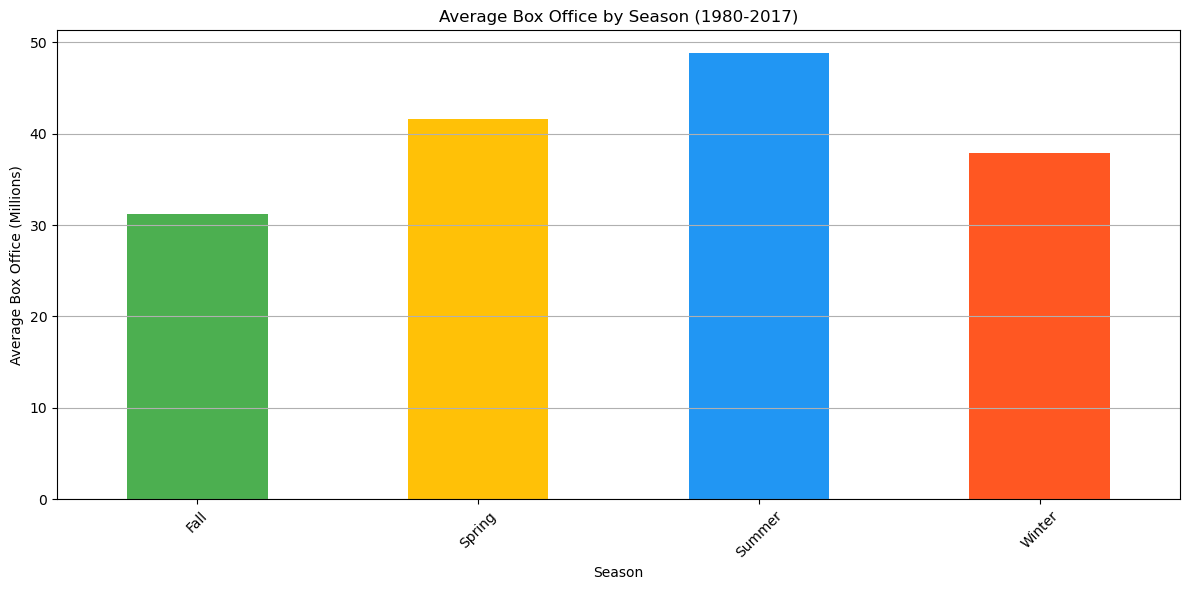

In [17]:
# Convert 'BoxOffice' to millions for the plot
movies_df['BoxOffice_millions'] = movies_df['BoxOffice'] / 1_000_000
# Define a function to get the season from the release month
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'
# Create a new column for season based on the release month
movies_df['Season'] = movies_df['release_date'].dt.month.apply(get_season)
# Group by Season and calculate the mean box office
box_office_by_season = movies_df.groupby('Season')['BoxOffice_millions'].mean().round(2)
# Plotting the box office averages by season
plt.figure(figsize=(12, 6))
box_office_by_season.plot(kind='bar', color=['#4CAF50', '#FFC107', '#2196F3', '#FF5722'])
# Adding titles and labels
plt.title('Average Box Office by Season (1980-2017)')
plt.xlabel('Season')
plt.ylabel('Average Box Office (Millions)')
plt.xticks(rotation=45)
plt.grid(axis='y')  # Add grid for better readability
plt.tight_layout()  # Adjust layout
plt.show() 

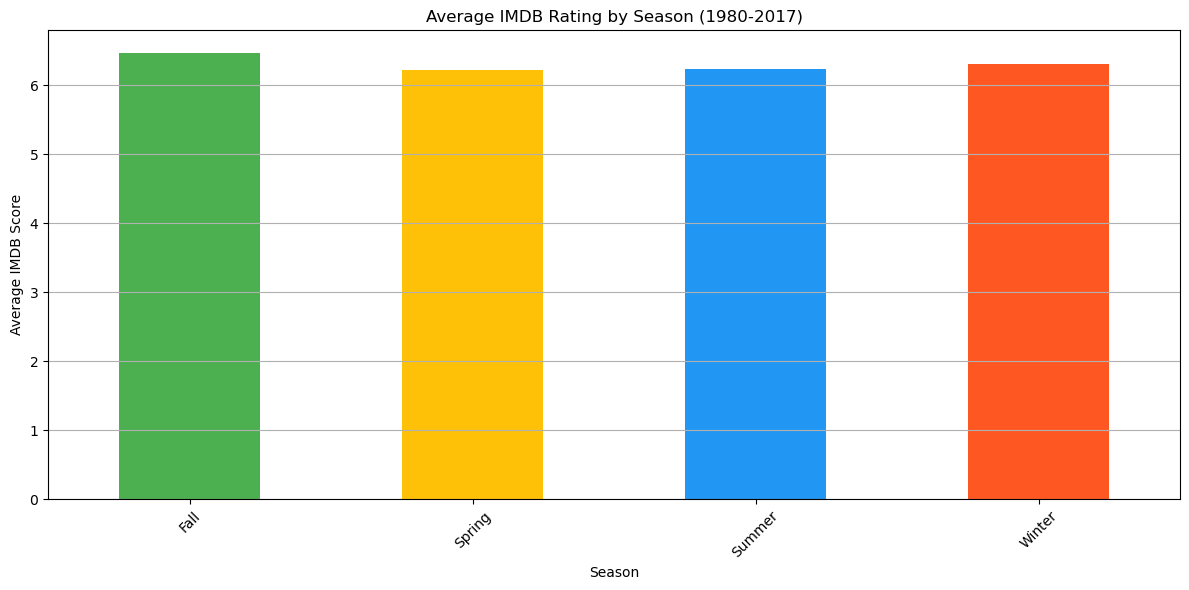

In [23]:
# Define a function to get the season from the release month
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'
# Create a new column for season based on the release month
movies_df['Season'] = movies_df['release_date'].dt.month.apply(get_season)
# Group by Season and calculate the mean box office
box_office_by_season = movies_df.groupby('Season')['imdbRating'].mean().round(2)
# Plotting the box office averages by season
plt.figure(figsize=(12, 6))
box_office_by_season.plot(kind='bar', color=['#4CAF50', '#FFC107', '#2196F3', '#FF5722'])
# Adding titles and labels
plt.title('Average IMDB Rating by Season (1980-2017)')
plt.xlabel('Season')
plt.ylabel('Average IMDB Score')
plt.xticks(rotation=45)
plt.grid(axis='y')  # Add grid for better readability
plt.tight_layout()  # Adjust layout
plt.show() 

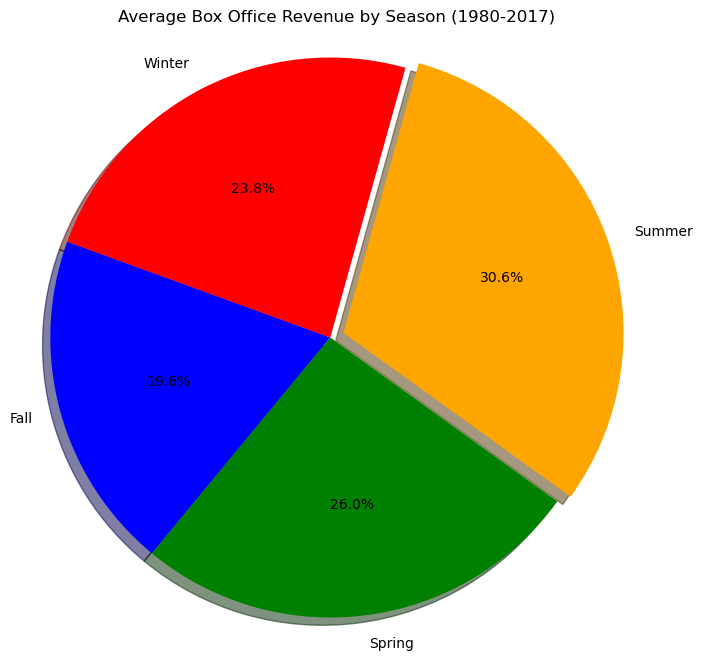

In [28]:
def get_season(date):
    if date.month in [12, 1, 2]:
        return 'Winter'
    elif date.month in [3, 4, 5]:
        return 'Spring'
    elif date.month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'
explode = (0, 0, 0.05, 0)
movies_df['season'] = movies_df['release_date'].apply(get_season)

# Aggregate values by season
season_summary = movies_df.groupby('season')['BoxOffice'].mean() 

plt.figure(figsize=(8, 8))
plt.pie(season_summary, explode=explode, labels=season_summary.index, autopct='%1.1f%%', startangle=160, shadow = True, colors=list(colors.values()))
plt.title('Average Box Office Revenue by Season (1980-2017)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show() 

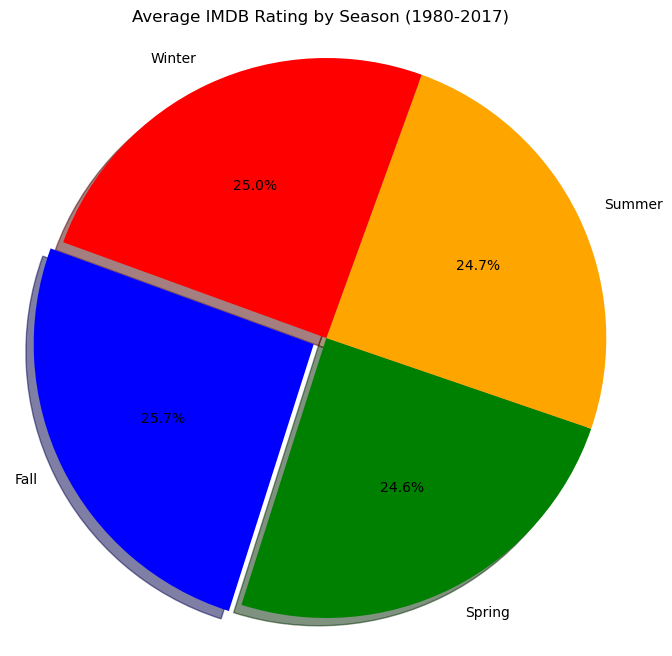

In [27]:
def get_season(date):
    if date.month in [12, 1, 2]:
        return 'Winter'
    elif date.month in [3, 4, 5]:
        return 'Spring'
    elif date.month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'
explode = (0.05, 0, 0, 0) 
movies_df['season'] = movies_df['release_date'].apply(get_season)

# Aggregate values by season
season_summary = movies_df.groupby('season')['imdbRating'].mean() 

plt.figure(figsize=(8, 8))
plt.pie(season_summary, explode=explode, labels=season_summary.index, autopct='%1.1f%%', startangle=160, shadow = True, colors=list(colors.values()))
plt.title('Average IMDB Rating by Season (1980-2017)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show() 